In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbextension", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 988, in start
    super(NBExtensionApp, self).start()
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 256, in start
    self.subapp.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 716, in start
    self.install_extensions()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 695, in install_extensions
    **kwargs
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 21

In [2]:
# This is the uploader widget
#after running the cell a popup window will open and ask to browse a file then you have to browse to the location of file whchi yu want to give and it will make a string variable and put all the content of the file in that variable

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

# **I the uploader doesn't work then you can manually make the string variable which stores the whole text of the file**
# **Below is the example of it:**

In [3]:
file_contents = """It was quite by accident I discovered this incredible invasion of
Earth by lifeforms from another planet. As yet, I haven't done 
anything about it; I can't think of anything to do. I wrote to the
Government, and they sent back a pamphlet on the repair and
maintenance of frame houses. Anyhow, the whole thing is known; I'm not
the first to discover it. Maybe it's even under control.

I was sitting in my easy-chair, idly turning the pages of a
paperbacked book someone had left on the bus, when I came across the
reference that first put me on the trail. For a moment I didn't
respond. It took some time for the full import to sink in. After I'd
comprehended, it seemed odd I hadn't noticed it right away.

The reference was clearly to a nonhuman species of incredible
properties, not indigenous to Earth. A species, I hasten to point out,
customarily masquerading as ordinary human beings. Their disguise,
however, became transparent in the face of the following observations
by the author. It was at once obvious the author knew everything. Knew
everything--and was taking it in his stride. The line (and I tremble
remembering it even now) read:

    _... his eyes slowly roved about the room._

Vague chills assailed me. I tried to picture the eyes. Did they roll
like dimes? The passage indicated not; they seemed to move through the 
air, not over the surface. Rather rapidly, apparently. No one in the
story was surprised. That's what tipped me off. No sign of amazement
at such an outrageous thing. Later the matter was amplified.

    _... his eyes moved from person to person._

There it was in a nutshell. The eyes had clearly come apart from the
rest of him and were on their own. My heart pounded and my breath
choked in my windpipe. I had stumbled on an accidental mention of a
totally unfamiliar race. Obviously non-Terrestrial. Yet, to the
characters in the book, it was perfectly natural--which suggested they
belonged to the same species.

And the author? A slow suspicion burned in my mind. The author was
taking it rather _too easily_ in his stride. Evidently, he felt this
was quite a usual thing. He made absolutely no attempt to conceal this
knowledge. The story continued:

    _... presently his eyes fastened on Julia._"""

In [4]:
#Calculate_frequencies function iterates over the string variable which we make earlier and filters out unnecessary words punctuation marks so that we can pass ot to next step and make the word cloud.

def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~1234567890'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my","on", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "not", "no","just","in"]
    
    # LEARNER CODE START HERE
    global text
    content_list=file_contents.split(" ")
    list=[]
    for char in content_list:
        x=char.lower()
        if x not in uninteresting_words:
            if "\n" in char:
                char=char.replace("\n","")
            for letter in punctuations:
                char=char.replace(letter,"")
            if(char!=""):
                list.append(char)
    text=" ".join(list)    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate(text)
    return cloud.to_array()

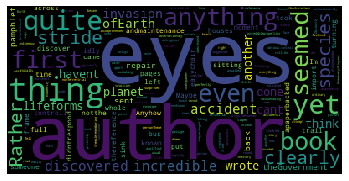

In [5]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()